Contents:
1. Import Necessary Libraries
2. Read in and Explore the Data
3. Data Analysis
4. Data Visualization
5. Cleaning Data
6. Choosing the Best Model

1) Import Necessary Libraries

In [1]:
# data analysis libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import os 
print("PACKAGES IS LOADED")


PACKAGES IS LOADED


2) Read in and Explore the Data

In [2]:
os.chdir(r"C:\Users\heon1\Desktop\DATA\titanic")
cwd = os.getcwd()
print(cwd)


C:\Users\heon1\Desktop\DATA\titanic


In [4]:
train = pd.read_csv(cwd+r"\train.csv", encoding= "UTF-8", index_col= 0)
test = pd.read_csv(cwd+r"\test.csv", encoding="UTF-8", index_col = 0)
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


3) Data Analysis

In [5]:
print(train.columns)
print(train.shape)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(891, 11)


In [6]:
train.sample(5)
# Numberical : Age, Fare, SibSp, Parch
# Categorical : Survived, Sex, Embarked, Pclass
# Alphaunumerical: Ticket, Cabin 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
412,0,3,"Hart, Mr. Henry",male,NaN,0,0,394140,6.8583,NaN,Q
217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C


In [7]:
train.describe(include = 'all')
# Observation
# Total 891 passengers
# Age column is missing approximately 19.% of its values. However, age column seem important so i should probably fill the gaps 
# Cabin feature is missing approximately 77.1% of its values. Too much data is missing so i should drop the column itself
# Embarked column is missing 0.22% of its values. It is very minimal so it won't matter


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Hakkarainen, Mr. Pekka Pietari",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
# NA Check
print(pd.isnull(train).sum()) #train_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [9]:
print(test.isna().sum()) # del name, ticket, cabin 
# interpolate age, fare, embarked
# sex to dummy
# sissp + parch = family num
# 

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [10]:
print(train.loc[1:5, "Ticket"])

PassengerId
1           A/5 21171
2            PC 17599
3    STON/O2. 3101282
4              113803
5              373450
Name: Ticket, dtype: object


In [11]:
# types check
train.dtypes

# del name, ticket, cabin 
# interpolate age, fare, embarked
# sex to dummy
# sissp + parch = family num
# 

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

# CLEANING DATA

In [12]:
# DELETE NAME TICKET, CABIN
del_columns = ['Name', 'Ticket', 'Cabin']
train.drop(del_columns, axis=1, inplace =True)
test.drop(del_columns, axis=1, inplace = True)
print("columns is %s" %train.columns)

columns is Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [13]:
train['Age'].fillna(value = train['Age'].mean(), inplace=True)
print(train.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64


In [14]:
print(pd.get_dummies(train['Embarked']).sum()) # so i will choose 'S'
train['Embarked'].fillna(value = 'S', inplace= True)
print("TRAIN NA SUM IS %s" %train.isna().sum().sum())

C    168
Q     77
S    644
dtype: int64
TRAIN NA SUM IS 0


In [16]:
test['Age'].fillna(value = test['Age'].mean(), inplace =True)
test['Fare'].fillna(value = test['Fare'].mean(), inplace = True)
test.isna().sum()


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
pcl = pd.get_dummies(train['Pclass'], drop_first=True)
sex = pd.get_dummies(train['Sex'], drop_first=True)
emb = pd.get_dummies(train['Embarked'], drop_first=True)

In [18]:
train2 =pd.concat([train, pcl, sex, emb], axis=1)
train2.columns
del_columns2 = ['Pclass', 'Sex', 'Embarked']
train2.drop(del_columns2, axis=1, inplace= True)

In [19]:
y_train = train2['Survived']
y_train
train2.drop(['Survived'], axis=1, inplace =True)


In [20]:
pcl2 = pd.get_dummies(test['Pclass'], drop_first=True)
sex2 = pd.get_dummies(test['Sex'], drop_first=True)
emb2 = pd.get_dummies(test['Embarked'], drop_first=True)
test2 = pd.concat([test, pcl2, sex2, emb2], axis=1)
test2.drop(del_columns2, axis=1, inplace = True)
test2.shape
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# age, fare 정규화
train2['Age'] = (train2['Age']- train2['Age'].mean())/train2['Age'].std()
#train2['Age'].Describe()
#pd.DataFrame.describe(train2['Age'])
train2['Fare'] = (train2['Fare'] - train2['Fare'].mean())/train2['Fare'].std()
train2.columns
train2.isna().sum()
train2.dtypes

test2['Age'] = (test['Age'] - test['Age'].mean())/test['Age'].std()
test2['Fare'] = (test['Fare'] - test['Fare'].mean())/ test['Fare'].std()

print(train2.shape, test2.shape)
print("train columns : %s \ntest columns: %s" %(train2.columns , test2.columns))


(891, 9) (418, 9)
train columns : Index(['Age', 'SibSp', 'Parch', 'Fare', 2, 3, 'male', 'Q', 'S'], dtype='object') 
test columns: Index(['Age', 'SibSp', 'Parch', 'Fare', 2, 3, 'male', 'Q', 'S'], dtype='object')


In [25]:
y_train.shape
y_test = pd.re

(891,)

In [39]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [29]:
test_tmp = pd.read_csv(cwd + r"\gender_submission.csv")


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [30]:
y_test = test_tmp['Survived']
y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [38]:
a = []
b = []
c = [0.1, 1, 10]
for i in c:
    log = LogisticRegression(C= i)
    log.fit(train2, y_train)
    a +=[accuracy_score(log.predict(train2), y_train)]
    b +=[accuracy_score(log.predict(test2), y_test)]




In [32]:
print(a)
print(b)

[0.8114478114478114, 0.8047138047138047, 0.8047138047138047]
[0.9401913875598086, 0.9521531100478469, 0.9449760765550239]


In [33]:
log1 = LogisticRegression(C=1)
log1.fit(train2, y_train)
accuracy_score(log1.predict(train2), y_train)
accuracy_score(log1.predict(test2), y_test)
confusion_matrix(log1.predict(test2), y_test)
print(classification_report(log1.predict(test2), y_test))


              precision    recall  f1-score   support

           0       0.97      0.96      0.96       268
           1       0.93      0.94      0.93       150

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



In [42]:
roc_auc_score(log1.predict(test2), y_test)

0.9494776119402986

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 


print(neigh.predict([[1.1]]))

print(neigh.predict_proba([[0.9]]))
[[0.66666667 0.33333333]]

In [44]:
d= []
e = []
f = [3,5,7,2]
for i in f:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(train2, y_train) 
    d +=[accuracy_score(neigh.predict(train2), y_train)]
    e +=[accuracy_score(neigh.predict(test2), y_test)]



In [46]:
print(d)
print(e)

[0.8754208754208754, 0.8619528619528619, 0.8428731762065096, 0.8866442199775533]
[0.80622009569378, 0.8157894736842105, 0.8349282296650717, 0.7822966507177034]


In [12]:
# Prediction
# 1.Sex: Females are more likely to survive
# 2.Sibsp/Parch: People traveling alone are more likely to survive
# 3.Age: Young children are more likely to survive
# 4.Pclass: People of higher socioeconomic class are more likely to survive

4) Data Visualization

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


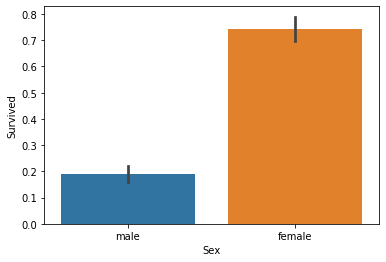

In [22]:
# Sex Feature
sns.barplot(x = "Sex", y = "Survived", data = train_df)
print("Percentage of females who survived:",
      train_df["Survived"][train_df["Sex"] == 'female'].value_counts(normalize = True)[1] * 100)
print("Percentage of males who survived:",
      train_df["Survived"][train_df["Sex"] == 'male'].value_counts(normalize = True)[1] * 100)


Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


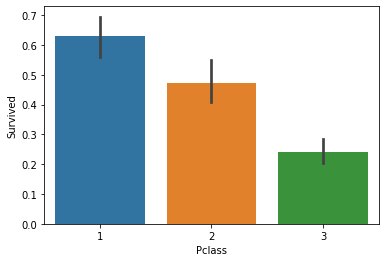

In [23]:
# Pclass 
sns.barplot(x = "Pclass", y = "Survived", data = train_df)
print("Percentage of Pclass = 1 who survived:", train_df["Survived"][train_df["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 2 who survived:", train_df["Survived"][train_df["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 3 who survived:", train_df["Survived"][train_df["Pclass"] == 3].value_counts(normalize = True)[1]*100)


Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143
Percentage of SibSp = 3 who survived: 25.0
Percentage of SibSp = 4 who survived: 16.666666666666664


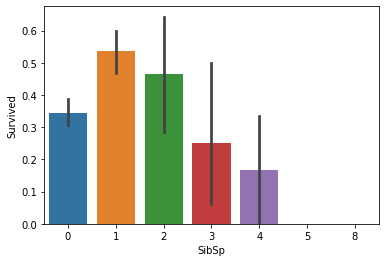

In [24]:
# SibSp (Number of Siblings/Spouses Aboard)
sns.barplot(x = "SibSp", y = "Survived", data = train_df)
print("Percentage of SibSp = 0 who survived:", train_df["Survived"][train_df["SibSp"] == 0].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 1 who survived:", train_df["Survived"][train_df["SibSp"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 2 who survived:", train_df["Survived"][train_df["SibSp"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 3 who survived:", train_df["Survived"][train_df["SibSp"] == 3].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 4 who survived:", train_df["Survived"][train_df["SibSp"] == 4].value_counts(normalize = True)[1]*100)


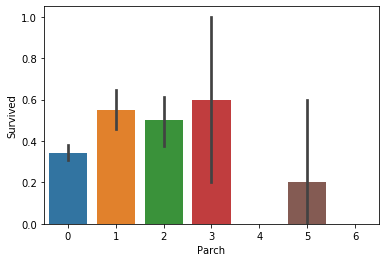

In [25]:
# Parch(Number of Parents/Children Aboard)
sns.barplot(x = "Parch", y = "Survived", data = train_df)
plt.show()

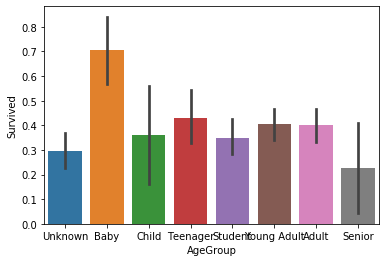

In [26]:
# Age
train_df["Age"] = train_df["Age"].fillna(-0.5)
test_df["Age"] = test_df["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df["Age"], bins, labels = labels)
test_df['AgeGroup'] = pd.cut(test_df["Age"], bins, labels = labels)
sns.barplot(x="AgeGroup", y="Survived", data=train_df)
plt.show()


Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


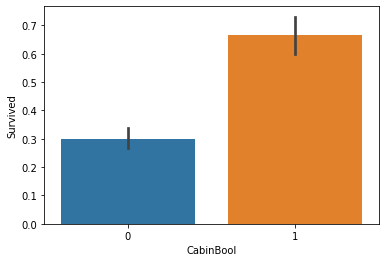

In [27]:
# Cabin (People with a recorded cabin number)
train_df["CabinBool"] = (train_df["Cabin"].notnull().astype('int'))
test_df["CabinBool"] = (test_df["Cabin"].notnull().astype('int'))
print("Percentage of CabinBool = 1 who survived:", train_df["Survived"][train_df["CabinBool"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of CabinBool = 0 who survived:", train_df["Survived"][train_df["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
sns.barplot(x="CabinBool", y="Survived", data=train_df)
plt.show()


5) Cleaning Data

In [ ]:
test_df.describe(include = 'all')
#We have a total of 418 passengers.
#1 value from the Fare feature is missing.
#Around 20.5% of the Age feature is missing, we will need to fill that in.


In [ ]:
# Cabin/Train column drop
train_df = train_df.drop(['Ticket'], axis = 1)
test_df = test_df.drop(['Ticket'], axis = 1)
test_df = test_df.drop(['Cabin'], axis = 1)
train_df = train_df.drop(['Cabin'], axis = 1)

test_df.describe(include = 'all')


In [ ]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = train_df[train_df["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train_df[train_df["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train_df[train_df["Embarked"] == "Q"].shape[0]
print(queenstown)
train_df = train_df.fillna({"Embarked": "S"})



In [ ]:
#Age
#Next we'll fill in the missing values in the Age feature. 
#Since a higher percentage of values are missing, it would be illogical to fill all of them with the same value. Instead, let's try to find a way to predict the missing ages.

combine = [train_df, test_df]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])


In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df["Title"].unique()

In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()


In [ ]:
mr_age = train_df[train_df["Title"] == 1]["AgeGroup"].mode() 
miss_age = train_df[train_df["Title"] == 2]["AgeGroup"].mode() 
mrs_age = train_df[train_df["Title"] == 3]["AgeGroup"].mode() 
master_age = train_df[train_df["Title"] == 4]["AgeGroup"].mode() 
royal_age = train_df[train_df["Title"] == 5]["AgeGroup"].mode() 
rare_age = train_df[train_df["Title"] == 6]["AgeGroup"].mode() 

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}
for x in range(len(train_df["AgeGroup"])):
    if train_df["AgeGroup"][x] == "Unknown":
        train_df["AgeGroup"][x] = age_title_mapping[train_df["Title"][x]]
        
for x in range(len(test_df["AgeGroup"])):
    if test_df["AgeGroup"][x] == "Unknown":
        test_df["AgeGroup"][x] = age_title_mapping[test_df["Title"][x]]

        
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train_df['AgeGroup'] = train_df['AgeGroup'].map(age_mapping)
test_df['AgeGroup'] = test_df['AgeGroup'].map(age_mapping)


In [ ]:
#Name drop
train_df = train_df.drop(['Name'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)


In [ ]:
#Sex values to numerical
sex_mapping = {"male": 0, "female": 1}
train_df['Sex'] = train_df['Sex'].map(sex_mapping)
test_df['Sex'] = test_df['Sex'].map(sex_mapping)


In [ ]:
#Embark
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping)
test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping)


In [ ]:
#Fare
for x in range(len(test_df["Fare"])):
    if pd.isnull(test_df["Fare"][x]):
        pclass = test_df["Pclass"][x] #Pclass = 3
        test_df["Fare"][x] = round(train_df[train_df["Pclass"] == pclass]["Fare"].mean(), 4)

train_df['FareBand'] = pd.qcut(train_df['Fare'], 4, labels = [1, 2, 3, 4])
test_df['FareBand'] = pd.qcut(test_df['Fare'], 4, labels = [1, 2, 3, 4])

train_df = train_df.drop(['Fare'], axis = 1)
test_df = test_df.drop(['Fare'], axis = 1)


In [ ]:
train_df.head()

In [ ]:
from sklearn.model_selection import train_test_split
# Use only 22% of Training data
predictors = train_df.drop(['Survived', 'PassengerId'], axis=1)
target = train_df["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

In [ ]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

In [ ]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

In [ ]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

In [ ]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

In [ ]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)


In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)


In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

In [ ]:
ids = test_df['PassengerId']
predictions = gbk.predict(test_df.drop('PassengerId', axis=1))
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output